# Store US Stock Prices in HDF5 Format

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load source data

In [2]:
df = pd.read_csv('../data/us_stocks.csv', parse_dates=['date'], index_col=['ticker', 'date'])

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, ('A', Timestamp('1999-11-18 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB


## Apply required transformations

In [4]:
idx = pd.IndexSlice
df.sort_index(level=['ticker','date'], ascending=[1, 1], inplace=True)
df = (df.loc[idx[:, '2000-01-01':], :]
      .filter(like='adj', axis=1)
      .rename(columns=lambda x: x.replace('adj_', ''))
      .dropna())
df.head()

open       high        low      close     volume
ticker date                                                             
A      2000-01-03  53.726454  53.856080  45.969377  49.121329  3343600.0
       2000-01-04  46.481058  46.992738  44.175084  45.369006  3408500.0
       2000-01-05  45.198445  45.239380  41.828176  41.998737  4119200.0
       2000-01-06  42.046493  42.298923  39.658651  40.934441  1812900.0
       2000-01-07  40.293135  44.986951  40.252200  44.345645  2016900.0

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11343366 entries, ('A', Timestamp('2000-01-03 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count     Dtype  
---  ------  --------------     -----  
 0   open    11343366 non-null  float64
 1   high    11343366 non-null  float64
 2   low     11343366 non-null  float64
 3   close   11343366 non-null  float64
 4   volume  11343366 non-null  float64
dtypes: float64(5)
memory usage: 476.7+ MB


## Plot data

In [6]:
symbols = sorted(list({d[0] for d in df.index}))
print(f"There are {len(symbols)} tickers")

There are 3199 tickers


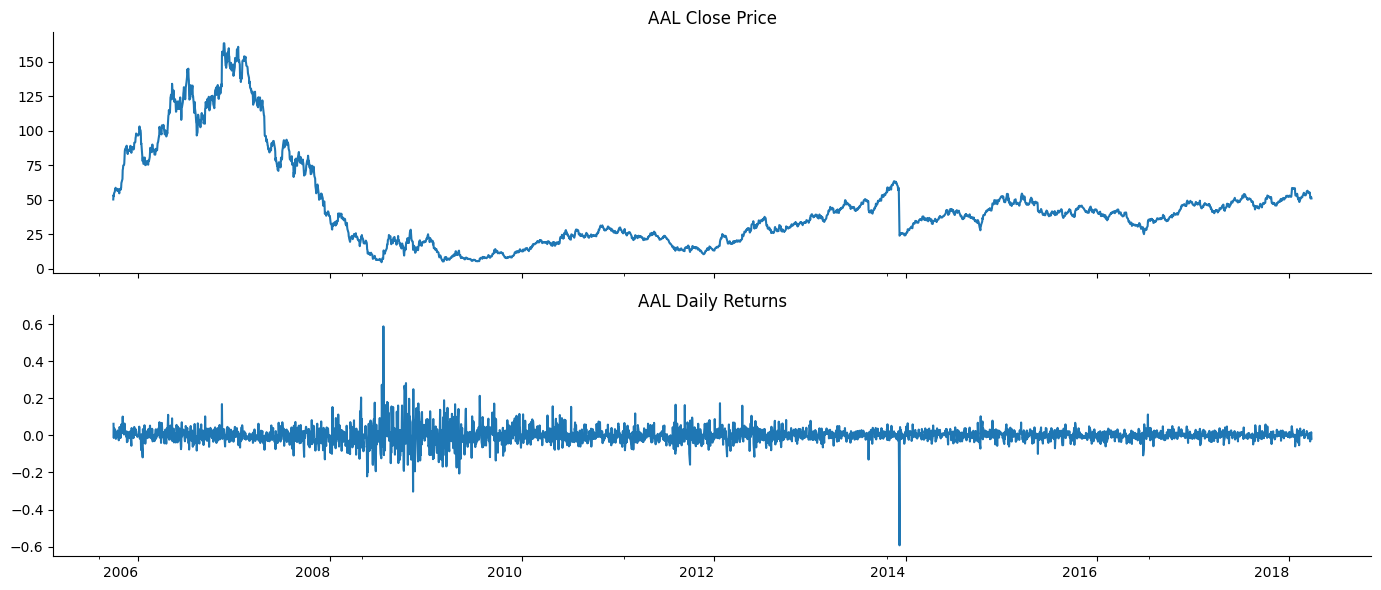

In [7]:
symbol = symbols[2]
fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
s = df.loc[symbol, 'close']
s.plot(rot=0, ax=axes[0], title=f'{symbol} Close Price')
s.pct_change().plot(rot=0, ax=axes[1], title=f'{symbol} Daily Returns')
axes[1].set_xlabel('')
sns.despine()
fig.tight_layout()

## Store in HDF5 format

In [8]:
df.to_hdf('../data/stock_prices.h5', 'us_stocks')

C:\Users\okmic\AppData\Local\Temp\ipykernel_22352\3134340625.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf('../data/stock_prices.h5', 'us_stocks')
